In [137]:
import sys
print(sys.version)

3.6.1 |Continuum Analytics, Inc.| (default, Mar 22 2017, 19:25:17) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [144]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [139]:
file_name = "ExperimentData.csv"

# Clean up file:
# Read in the file
with open(file_name, 'r') as file :
    filedata = file.read()

# Replace the target string
filedata = filedata.replace('NA,NA,NA,NA', 'NA,NA,NA') 

# Write the file out again
with open(file_name, 'w') as file:
    file.write(filedata)

# Make data ready:
df = pd.read_csv(file_name)

columns = df.columns.values
types = ["slider_grey", "slider_num", "wrist_grey", "wrist_num", "arm_grey", "arm_num"]
type_frames = []
for t in types:
    type_frames.append(df.loc[df['type'] == t])

In [156]:
participants_frames = []
participants_std = pd.DataFrame()

for i in range(max(df.loc[: , "id"])+1):
    participants_frames.append(df.loc[df['id'] == i])
    
for pf in participants_frames:
    p_id = pf['id'].iloc[0]
    p_std = []
    for t in types:
        tmp_df = pf.loc[pf['type'] == t]
        x = tmp_df.loc[: , columns[7]]
        y = round(tmp_df.loc[: , columns[8]])
        abs_errors = x.subtract(y).abs()
        error_std = np.std(abs_errors)
        p_std.append(error_std)
        
    mean_std = np.mean(p_std)
    median_std = np.median(p_std)
    tmp_df = pd.DataFrame([[p_id]+p_std+[mean_std,median_std]], columns=["id"]+types+["mean STD",'median STD'])
    participants_std = participants_std.append(tmp_df)
#    break

<H1>Standard deviation of the absolute error for each subject</H1>

In [159]:
print("MEAN")
print("Mean of mean STD:",np.mean(participants_std.loc[: , 'mean STD']))
print("Median of mean STD:",np.median(participants_std.loc[: , 'mean STD']))
print('MEDIAN')
print("Mean of median STD:",np.mean(participants_std.loc[: , 'median STD']))
print("Median of median STD:",np.median(participants_std.loc[: , 'median STD']))
participants_std

MEAN
Mean of mean STD: 4.72722416106
Median of mean STD: 4.47441474847
MEDIAN
Mean of median STD: 4.56064392135
Median of median STD: 4.10728613438


,id,slider_grey,slider_num,wrist_grey,wrist_num,arm_grey,arm_num,mean STD,median STD
0,0,4.510820,6.803492,7.043437,8.657222,3.389321,7.690904,6.349199,6.923464
0,1,2.900000,1.657558,3.309078,6.881134,2.353720,4.563716,3.610868,3.104539
0,2,3.150794,4.848711,3.040970,7.247586,4.352873,5.402546,4.673913,4.600792
0,3,7.238784,1.545154,6.680382,4.092676,3.134884,2.957617,4.274916,3.613780


<H1>Historgram showing the distributions of stimuli and responses for each exersise together with a scatterplot</H1>

slider_grey


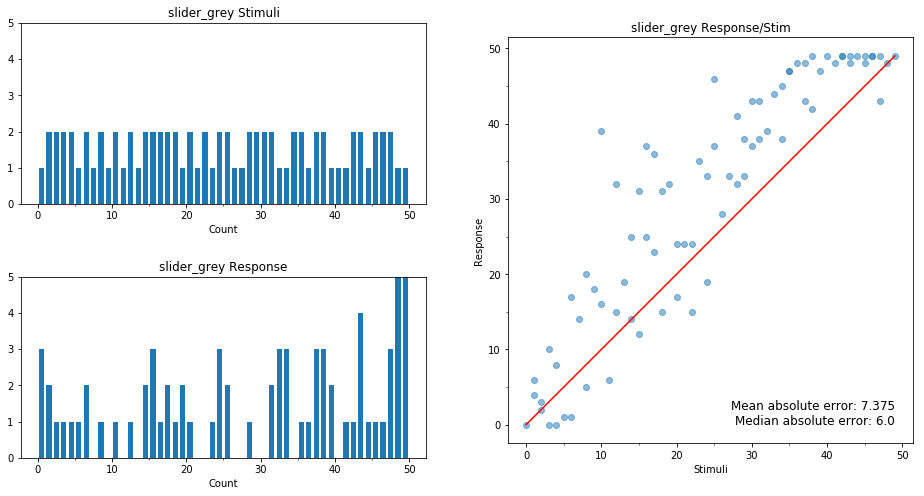

slider_num


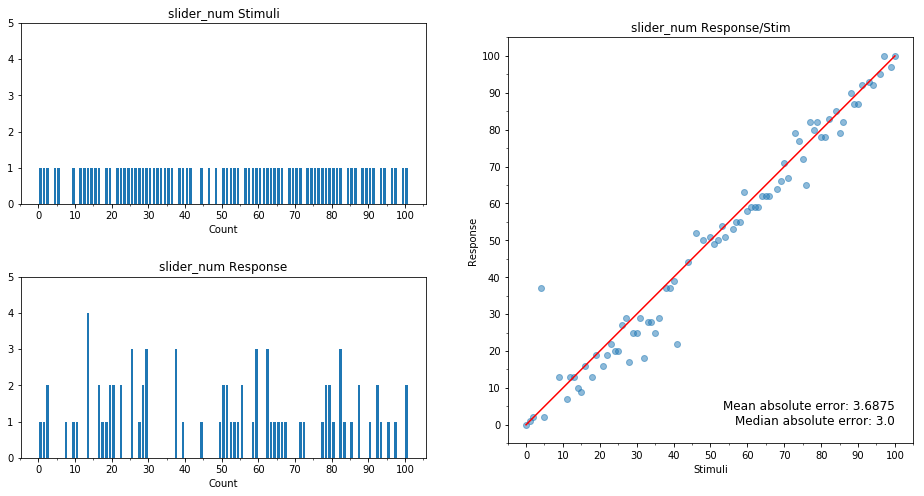

wrist_grey


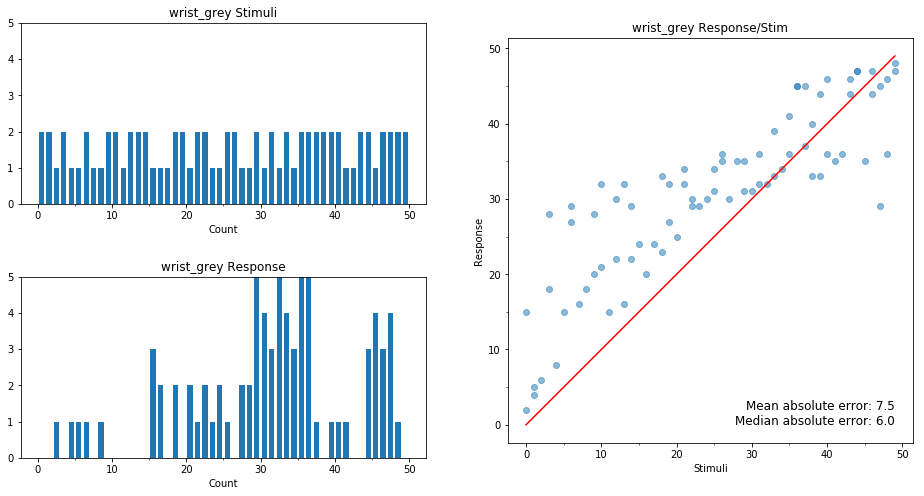

wrist_num


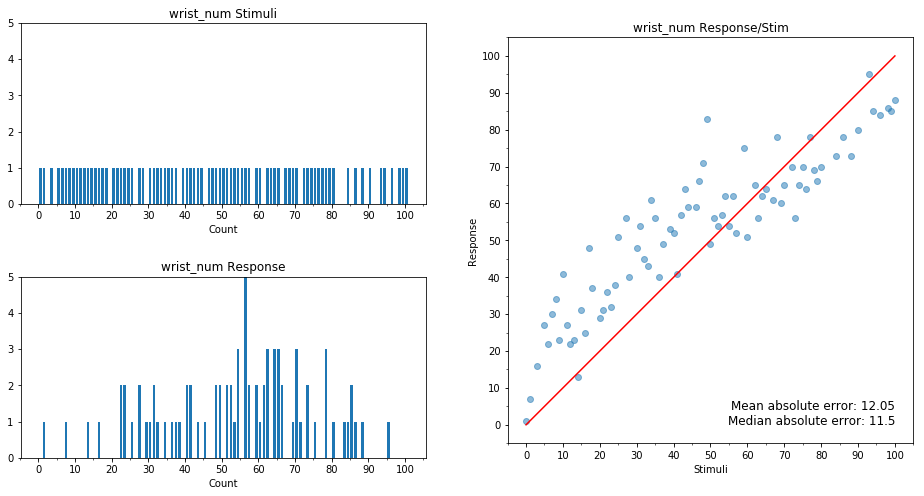

arm_grey


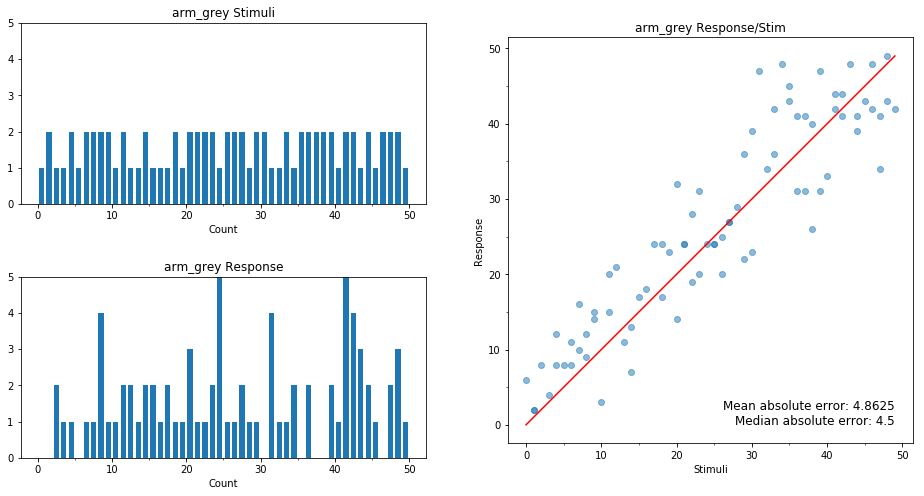

arm_num


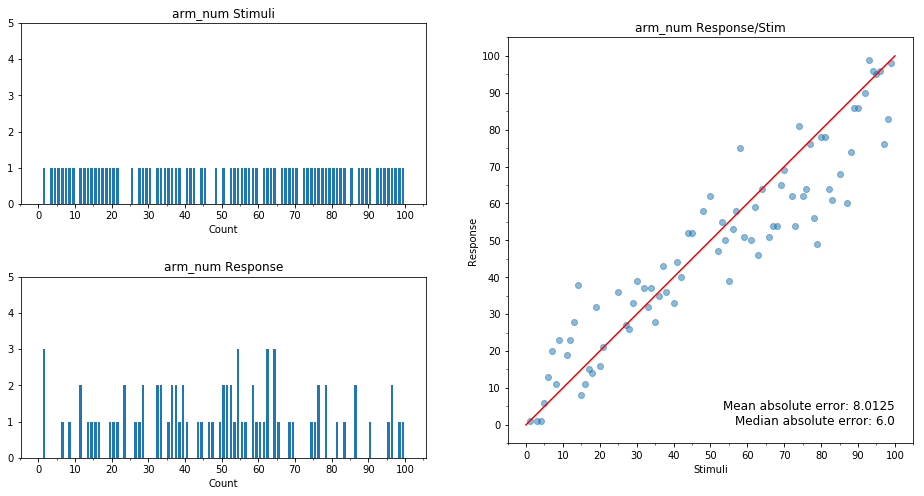

In [146]:
errors = []
for i in range(6):
    print(types[i])
    x = type_frames[i].loc[: , columns[7]]
    y = round(type_frames[i].loc[: , columns[8]])
    if "grey" in types[i]:
        hist1, bins1 = np.histogram(x, bins=range(51))
        hist2, bins2 = np.histogram(y, bins=range(51))
        yMax = 49
    else:
        hist1, bins1 = np.histogram(x, bins=range(102))
        hist2, bins2 = np.histogram(y, bins=range(102))
        yMax = 100
    
    width1 = 0.7 * (bins1[1] - bins1[0])
    center1 = (bins1[:-1] + bins1[1:]) / 2
    width2 = 0.7 * (bins2[1] - bins2[0])
    center2 = (bins2[:-1] + bins2[1:]) / 2
    
    # Create figure with grid
    fig = plt.figure(figsize=(16,8), facecolor='white')
    gs = gridspec.GridSpec(2,2)
    # General tick marks
    majorLocator = MultipleLocator(10)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(5)

    # Add 1st plot (hist)    
    ax1 = fig.add_subplot(gs[0,0])
    ax1.bar(center1, hist1, align='center', width=width1)
    ax1.set_title(types[i]+" Stimuli")
    ax1.set_xlabel("Stimuli")
    ax1.set_xlabel("Count")
    ax1.set_ylim(0,5)
    ax1.xaxis.set_major_locator(majorLocator)
    ax1.xaxis.set_minor_locator(minorLocator)
    
    # Add 2st plot (hist)
    ax2 = fig.add_subplot(gs[1,0])
    ax2.set_title(types[i]+" Response")
    ax2.bar(center2, hist2, align='center', width=width2)
    ax2.set_xlabel("Response")
    ax2.set_xlabel("Count")
    ax2.set_ylim(0,5)
    ax2.xaxis.set_major_locator(majorLocator)
    ax2.xaxis.set_minor_locator(minorLocator)

    # Add 3rd plot (scatter)
    ax3 = fig.add_subplot(gs[0:,1],aspect=1)
    ax3.set_title(types[i]+" Response/Stim")
    ax3.scatter(x,y,alpha=0.5)
    ax3.plot([0,yMax],[0,yMax],color='red')
    ax3.set_xlabel("Stimuli")
    ax3.set_ylabel("Response")
    mean_error = mean_absolute_error(x,y)
    median_error = median_absolute_error(x,y)
    errors.append((mean_error,median_error))
    txt1 = "Mean absolute error: "+str(mean_error)
    txt2 = "Median absolute error: "+str(median_error)
    ax3.text(yMax, 0.01, txt1+"\n"+txt2, horizontalalignment='right', fontsize=12)
    ax3.xaxis.set_major_locator(majorLocator)
    ax3.xaxis.set_minor_locator(minorLocator)
    ax3.yaxis.set_major_locator(majorLocator)
    ax3.yaxis.set_minor_locator(minorLocator)

    # Spacing
    gs.update(wspace=0.2, hspace=0.4)
    plt.savefig("plots/"+types[i]+"_plots.png")
    plt.show()
    #break

<H1>Mean and median absolute error for each exercise (same as in scatterplot above)</H1>

In [155]:
errors_df = pd.DataFrame()
for i in range(6):
    tmp_df = pd.DataFrame([[types[i], errors[i][0], errors[i][1]]], columns=["type", "mean absolute error", "median absolute error"])
    errors_df = errors_df.append(tmp_df)

print("MEAN")
print("Mean of mean abosulte error:",np.mean(errors_df.loc[: , 'mean absolute error']))
print("Median of mean abosulte error:",np.median(errors_df.loc[: , 'mean absolute error']))
print('MEDIAN')
print("Mean of median abosulte error:",np.mean(errors_df.loc[: , 'median absolute error']))
print("Median of median abosulte error:",np.median(errors_df.loc[: , 'median absolute error']))
errors_df

MEAN
Mean of mean abosulte error: 7.24791666667
Median of mean abosulte error: 7.4375
MEDIAN
Mean of median abosulte error: 6.16666666667
Median of median abosulte error: 6.0


,type,mean absolute error,median absolute error
0,slider_grey,7.3750,6.0
0,slider_num,3.6875,3.0
0,wrist_grey,7.5000,6.0
0,wrist_num,12.0500,11.5
0,arm_grey,4.8625,4.5
0,arm_num,8.0125,6.0
